In [3]:
!pip install plotly

In [4]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        
import numpy as np # linear algebra
import pandas as pd # data processing

#importing visualising libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline

#NLP
import nltk
from nltk.corpus import stopwords

#Data Cleaning
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#Training Model
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [5]:
msgs = pd.read_csv("input/spam.csv",encoding='latin-1')

In [6]:
msgs.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
#Dropping unnecessary columns
msgs.drop(msgs.columns[[2, 3, 4]], axis = 1, inplace = True)

In [8]:
#Renaming columns
msgs.rename(columns = {'v1': 'label', 'v2': 'message'},inplace=True)

In [9]:
msgs.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
msgs.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
msgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


It can be seen there are no null values in data.

In [12]:
msgs.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [13]:
Category_count=np.array(msgs['label'].value_counts())
labels=sorted(msgs['label'].unique())

In [14]:
fig = go.Figure(data=[go.Pie(labels=labels, values=Category_count, hole=.3)])
fig.show()

In [15]:
msgs['length'] = msgs['message'].apply(len)
msgs.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [16]:
fig = px.histogram(msgs, x="length",color="label")
fig.show()

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

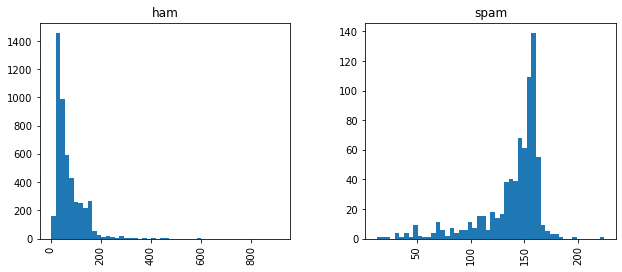

In [17]:
msgs.hist(column='length', by='label',bins=50, figsize=(10,4))

In [18]:
msgs.length.describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

In [19]:
msgs[msgs['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [20]:
#Forming function for msgs
#Removing punctuations and stopwords
def text_process(mess):
  nopunc=[char for char in mess if char not in string.punctuation]
  nopunc=''.join(nopunc)
  return [word for word in nopunc.split() if word.lower() not in stopwords.words('english') ]

In [22]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vinay\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [23]:
#making lists of tokens(lemmas)
msgs['message'].apply(text_process)

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [2nd, time, tried, 2, contact, u, U, å£750, Po...
5568                   [Ì, b, going, esplanade, fr, home]
5569                     [Pity, mood, Soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [Rofl, true, name]
Name: message, Length: 5572, dtype: object

In [24]:
#converting text doc to a matrix of token counts using scikit countvectorizer 
bow_transformer = CountVectorizer(analyzer=text_process).fit(msgs['message'])

# Print total number of vocab words
print (len(bow_transformer.vocabulary_))

11304


In [25]:
#calculating sparsity
msgs_bow=bow_transformer.transform(msgs['message'])
print ('Shape of Sparse Matrix:{}',format(msgs_bow.shape))
print ('Amount of Non-Zero occurences:{}',format(msgs_bow.nnz))
print ('sparsity: %.2f%%' % (100.0 * msgs_bow.nnz / (msgs_bow.shape[0] * msgs_bow.shape[1])))

Shape of Sparse Matrix:{} (5572, 11304)
Amount of Non-Zero occurences:{} 50193
sparsity: 0.08%


In [26]:
print(msgs_bow)

  (0, 1096)	1
  (0, 1461)	1
  (0, 2027)	1
  (0, 4574)	1
  (0, 5135)	1
  (0, 5136)	1
  (0, 5685)	1
  (0, 6131)	1
  (0, 6815)	1
  (0, 6846)	1
  (0, 7456)	1
  (0, 7567)	1
  (0, 8231)	1
  (0, 8809)	1
  (0, 10845)	1
  (0, 11043)	1
  (1, 2407)	1
  (1, 3012)	1
  (1, 7600)	1
  (1, 8482)	1
  (1, 10582)	1
  (1, 10952)	1
  (2, 73)	1
  (2, 422)	1
  (2, 429)	1
  :	:
  (5568, 6604)	1
  (5568, 6791)	1
  (5568, 7065)	1
  (5568, 11239)	1
  (5569, 3169)	1
  (5569, 3655)	1
  (5569, 8147)	1
  (5569, 10087)	1
  (5570, 4430)	1
  (5570, 4973)	1
  (5570, 5169)	1
  (5570, 6196)	1
  (5570, 6612)	1
  (5570, 6710)	1
  (5570, 6892)	1
  (5570, 7190)	1
  (5570, 7297)	1
  (5570, 7698)	1
  (5570, 8314)	1
  (5570, 9804)	1
  (5570, 10669)	1
  (5570, 10886)	1
  (5571, 3370)	1
  (5571, 8243)	1
  (5571, 10532)	1


In [27]:
tfidf_transformer = TfidfTransformer().fit(msgs_bow)
msgs_tfidf = tfidf_transformer.transform(msgs_bow)
print (msgs_tfidf.shape)

(5572, 11304)


In [28]:
print(msgs_tfidf)

  (0, 11043)	0.2302307806673824
  (0, 10845)	0.19070440364977176
  (0, 8809)	0.24700781968848798
  (0, 8231)	0.17135863098645995
  (0, 7567)	0.263992475219973
  (0, 7456)	0.31248959807463006
  (0, 6846)	0.18344049775392818
  (0, 6815)	0.15156099829325625
  (0, 6131)	0.18912594285931972
  (0, 5685)	0.2498079760885523
  (0, 5136)	0.26866384122613163
  (0, 5135)	0.2983050989432094
  (0, 4574)	0.31248959807463006
  (0, 2027)	0.24200168290449323
  (0, 1461)	0.31248959807463006
  (0, 1096)	0.28824103664730155
  (1, 10952)	0.4005697292204744
  (1, 10582)	0.20689436953946386
  (1, 8482)	0.504282830397047
  (1, 7600)	0.37669696082530857
  (1, 3012)	0.29116619142344646
  (1, 2407)	0.5619244500186726
  (2, 11003)	0.1909725859033143
  (2, 10964)	0.15964606600812142
  (2, 10570)	0.1399031851067661
  :	:
  (5568, 6791)	0.31367469776242124
  (5568, 6604)	0.47781076401785183
  (5568, 6267)	0.5575721048646767
  (5568, 4801)	0.3853122086093004
  (5569, 10087)	0.520467167163554
  (5569, 8147)	0.432829970

In [29]:
spam_detect_model=MultinomialNB().fit(msgs_tfidf, msgs['label'])

In [30]:
#test
all_predictions=spam_detect_model.predict(msgs_tfidf)
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [31]:
from sklearn.metrics import classification_report
print(classification_report(msgs['label'],all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572

